## <center>Calculate \& Display DGS corpus statistics</center> 

<hr style="height:2px;border-width:0;color:gray;background-color:gray"> 

#### Imports

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt 
import statistics

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

### Corpus data

In [2]:
"""
These are the paths to the two phoenix corpus text files stored locally
german: the german sentences 
glosses: the gloss sentences 

"""
data_dir = Path('path') 

german_stripped = data_dir / 'german_stripped_train.txt' 
glosses = data_dir / 'glosses_train.txt'

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

### Define functions

In [3]:
"""
This is a function that measures the length of each sentence from the corpus. 
It counts each word (could also be a number). 
Empty spaces and new lines are not counted as characters. 

The function takes as an input a text file OR csv file 
where each line is a separate sentence stripped from punctuation. 

The function starts with an empty array to which each tumple will be added.
It goes through each line of the text/ csv file, splits the line where there are 
empty spaces into single strings and counts their number.

Then it creates a tuple in the form of (sentence, length), 
where sentence is the initial line of the text file (str) 
and length is the number of single words in the sentence (int). 

The function returns a list of tuples with two elements each. 

Parameters
----------
in_txt : text/csv file 

"""

def measure_sentence_length(in_txt) -> list:
    
    sentence_and_length = [] 
    
    with open(in_txt, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip('\n') 
            # split the sentence into its compound parts (words)   
            words = line.split(' ')
            # initialize a counter for the length
            sentence_length = 0 
            # count each word and increase the counter  
            for i in range(0, len(words)):
                sentence_length = sentence_length + 1
            sentence_and_length.append((line, sentence_length)) 
    f.close()
    return sentence_and_length 

In [4]:
"""
This is a function that takes a list of tuples with two elements
in the form (sentence, length) and sorts the list first according 
to the second element in the tuple, which is the length (int). 

The function returns a sorted list of tuples with two elements each.

Parameters
----------
in_lst : list 

"""

def sort_sentences(in_list) -> list:
    return sorted(in_list, key=lambda x:(x[1], x[0]))

In [5]:
"""
This is a function that takes a list of tuples with two elements each 
in the form (sentence, length) and calculates the mean of the lengths.

The function returns float.

Parameters
----------
in_lst : list 

"""

def calculate_mean(in_list) -> float:
    lengths = []
    for element in in_list:
        lengths.append(element[1]) 
    return statistics.mean(lengths)

In [6]:
"""
This is a function that takes a list of tuples with two elements each 
in the form (sentence, length) and calculates the standard deviation 
of the lengths.

The function returns float.

Parameters
----------
in_lst : list 

"""

def calculate_std(in_list) -> float:
    lengths = []
    for element in in_list:
        lengths.append(element[1])
    return statistics.pstdev(lengths)

In [7]:
"""
This is a function that creates a bar graph. 
It takes a single list of tuples as an 
argument. 

Parameters
----------
in_lst : list

"""

def sentences_plot(in_list):
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 3, 1])
    
    # plot the lengths of the german/ gloss sentences
    x1 = [x for x in range(0, len(in_list))]
    y1 = [y[1] for y in in_list]
    plt.plot(x1, y1)
    
    plt.xlabel('Sentence from the trainig set')
    plt.ylabel('Length of the sentence in words')
    
    plt.show()

In [8]:
"""
This is a function that creates a line graph. 
It takes two lists as arguments.

Parameters
----------
in_german : list of tuples with german sentences 
in_glosses: list of tuples with gloss sentences 

"""

def shared_plot(in_german, in_glosses):
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 2, 1])
    
    # plot the lengths of the german sentences
    x1 = [x for x in range(0, len(in_german))]
    y1 = [y[1] for y in in_german]
    plt.plot(x1, y1, label = "German sentences")
    
    # plot the lengths of the gloss sentences
    x2 = [x for x in range(0, len(in_glosses))]
    y2 = [y[1] for y in in_glosses]
    plt.plot(x2, y2, label = "Gloss sentences")

    # axes labels
    plt.xlabel('Sentence from the trainig set')
    plt.ylabel('Length of the sentence in words')
    
    plt.title('Compare german and gloss sentences lengths')
    plt.legend()
    plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

---

### 1. Statistics for the german sentences of the corpus

#### Measure the length of each sentence

In [9]:
measured_german_sentences = measure_sentence_length(german_stripped)

#### Display the first 10

In [10]:
measured_german_sentences[:10]

[('wie mein leben aussieht', 4),
 ('na ja ich bin als gehörloser aufgewachsen', 7),
 ('ich habe eher das gefühl wenn ich mir vorstelle dass ich allein bin dann wäre ich einsam',
  17),
 ('da treffe ich lieber viele gehörlose und mache mit denen was dann ist mein leben schön',
  16),
 ('aber das ist ja klar', 5),
 ('dann ist alleinsein nicht schlimm', 5),
 ('als ich damals in den kindergarten kam wusste ich noch nichts', 11),
 ('ich spielte mit hörenden kindern und kann mich nicht an unterschiede zwischen hörenden und gehörlosen erinnern',
  16),
 ('so ging es weiter bis ich in den kindergarten in halberstadt kam', 12),
 ('das war interessant ich war fasziniert von den gebärden und wir spielten zusammen das war klasse',
  16)]

In [11]:
sorted_german_sentences = sort_sentences(measured_german_sentences)

#### There are a lot of sentences that consist of only one word.

In [12]:
print(sorted_german_sentences[len(sorted_german_sentences) - 1])

('und dann ist endlich der eine tag im monat und sie freuen sich und fühlen sich wohl und wenn das vorbei ist müssen sie wieder einen ganzen monat lang zu hause sitzen und warten', 34)


#### Display the longest german sentence

In [13]:
f'Longest sentence is: \'{sorted_german_sentences[len(sorted_german_sentences) - 1][0]}\' with length {sorted_german_sentences[len(sorted_german_sentences) - 1][1]}'

"Longest sentence is: 'und dann ist endlich der eine tag im monat und sie freuen sich und fühlen sich wohl und wenn das vorbei ist müssen sie wieder einen ganzen monat lang zu hause sitzen und warten' with length 34"

#### Calculate the mean of the lengths

In [14]:
calculate_mean(measured_german_sentences)

8.700524620340543

#### Calculate the std of the lengths

In [15]:
calculate_std(measured_german_sentences)

5.074366130402077

---

### 2. Visualize the lengths of the german sentences

#### Plot the german sentences without sorting them

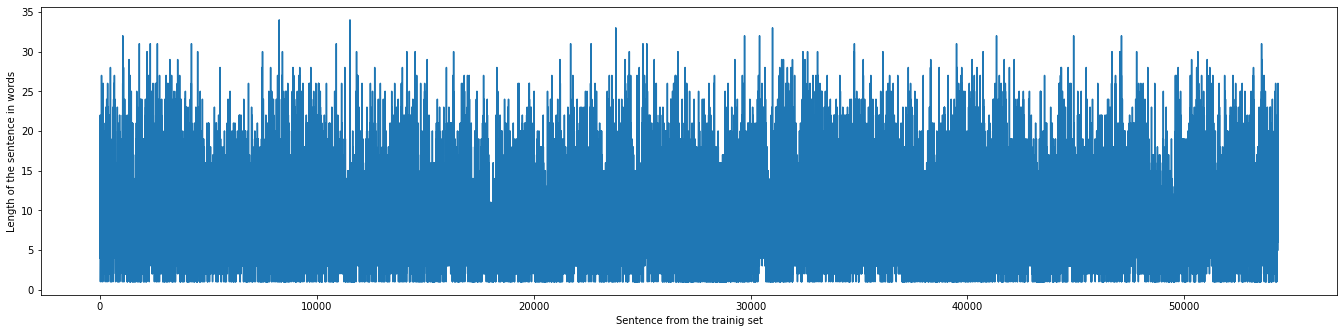

In [16]:
sentences_plot(measured_german_sentences)

#### Plot the sorted german sentences

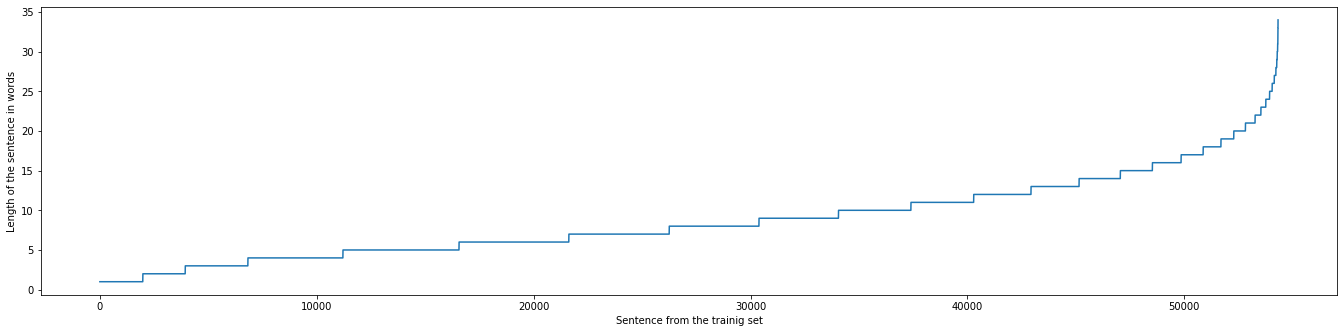

In [17]:
sentences_plot(sorted_german_sentences)

### 3. Statistics for the gloss side of the corpus

#### Measure the length of each gloss sentence

In [18]:
measured_gloss_sentences = measure_sentence_length(glosses)

#### Display the first 10

In [19]:
measured_gloss_sentences[:10]

[('SEHEN1* SELBST1A* LEBEN1A* SEHEN1 $GEST-OFF^', 5),
 ('AUFWACHSEN1A* ICH1 TAUB-GEHÖRLOS1A*', 3),
 ('MEHR1* MEIN1* GEFÜHL3 VORSTELLUNG1A* ICH1* ALLEIN1C* ICH1 BEREICH1A* GEFÜHL3* VORSTELLUNG1A',
  10),
 ('ICH1 MEHR1* TAUB-GEHÖRLOS1A* TREFFEN1* ZUSAMMEN1A* ICH1* GUT1* LEBEN4 GUT3* ZUSAMMEN1A* $GEST-OFF^',
  11),
 ('KLAR1A* $GEST^', 2),
 ('ALLEIN1C SCHLIMM3C* $GEST^', 3),
 ('ICH1 UNGEFÄHR1^ FRÜHER1 ANFANG1A* KINDERGARTEN1A BEREICH1A* ICH1 $GEST-OFF^*',
  8),
 ('ICH1 HÖREND1A* EINTRETEN1A* SPIELEN2* $PROD* INTERESSE1A UNTERSCHIED1C^* DENKEN1B DAMALS1* NICHTS1B ERINNERUNG2* NICHTS1B*',
  12),
 ('SPÄTER7* GENAU4^ ICH1 $INDEX1* HALB1B STADT2 KINDERGARTEN1A* EINTRETEN1A*',
  8),
 ('BEREICH1A* INTERESSE1A MERKWÜRDIG1^* GEBÄRDEN1A* FASZINIEREND2* GEBÄRDEN1A* SPIELEN2* BEREICH1A* INTERESSE1A* $GEST-OFF^',
  10)]

#### Sort the list of tuples according to the gloss sentence length

In [20]:
sorted_gloss_sentences = sort_sentences(measured_gloss_sentences)

In [21]:
sorted_gloss_sentences[:50]

[('$$EXTRA-LING-MAN^', 1),
 ('$$EXTRA-LING-MAN^', 1),
 ('$ALPHA-SK:J', 1),
 ('$ALPHA1:#', 1),
 ('$ALPHA1:#', 1),
 ('$ALPHA1:#-W', 1),
 ('$ALPHA1:A-B', 1),
 ('$ALPHA1:B-#-K', 1),
 ('$ALPHA1:B-E-C-K-S', 1),
 ('$ALPHA1:B-SS', 1),
 ('$ALPHA1:C-B-N-O-Ä-T_2', 1),
 ('$ALPHA1:D', 1),
 ('$ALPHA1:D', 1),
 ('$ALPHA1:D-F-C-E', 1),
 ('$ALPHA1:D-I-N', 1),
 ('$ALPHA1:E-S', 1),
 ('$ALPHA1:E-U-L-E-N', 1),
 ('$ALPHA1:E-U-S', 1),
 ('$ALPHA1:G', 1),
 ('$ALPHA1:H', 1),
 ('$ALPHA1:H', 1),
 ('$ALPHA1:H-A-Y*', 1),
 ('$ALPHA1:H-A-Y-E', 1),
 ('$ALPHA1:H-A-Y-E*', 1),
 ('$ALPHA1:H-R-S', 1),
 ('$ALPHA1:I', 1),
 ('$ALPHA1:J-N*', 1),
 ('$ALPHA1:K', 1),
 ('$ALPHA1:K_2', 1),
 ('$ALPHA1:K_2-L-K-L-E-I-S-T-O-W', 1),
 ('$ALPHA1:L', 1),
 ('$ALPHA1:L', 1),
 ('$ALPHA1:L', 1),
 ('$ALPHA1:L-A-V-E-G-A-S', 1),
 ('$ALPHA1:L-B-G', 1),
 ('$ALPHA1:O-X', 1),
 ('$ALPHA1:P-U-T-T-R-I-C-H', 1),
 ('$ALPHA1:R-M', 1),
 ('$ALPHA1:S-A-L', 1),
 ('$ALPHA1:S-A-N-D', 1),
 ('$ALPHA1:SCH', 1),
 ('$ALPHA1:SCH*', 1),
 ('$ALPHA1:SCH-#', 1),
 ('$ALPHA1

#### Display the longest gloss sentence

In [22]:
f'Longest sentence is: \'{sorted_gloss_sentences[len(sorted_gloss_sentences) - 1][0]}\' with length {sorted_gloss_sentences[len(sorted_gloss_sentences) - 1][1]}'

"Longest sentence is: 'DEUTSCH1* $INDEX1 MUSS1A^ DU1* FERTIG1A* $INDEX1 PHASE1A^* $INDEX1 NULL6A* TRAINING1* $GEST-ABWINKEN1^* ICH2* DORTMUND1* KARTE1C ICH1* $INDEX1 TRAINING1* WOFÜR3* AB1A ICH2 WOLLEN5 JAHR1B* PAUSE1* AB1A ICH1* TRAINING1* ICH1* AB1A TRAINING1* KARTE1C* DANN1A $GEST-ÜBERLEGEN1^' with length 32"

#### Calculate the mean of the lengths

In [23]:
calculate_mean(measured_gloss_sentences)

5.554937873907041

#### Caluclate the std of the lengths

In [24]:
calculate_std(measured_gloss_sentences)

3.6355540628694367

### 4. Visualize the lengths of the gloss sentences

#### Plot the gloss sentences without sorting them

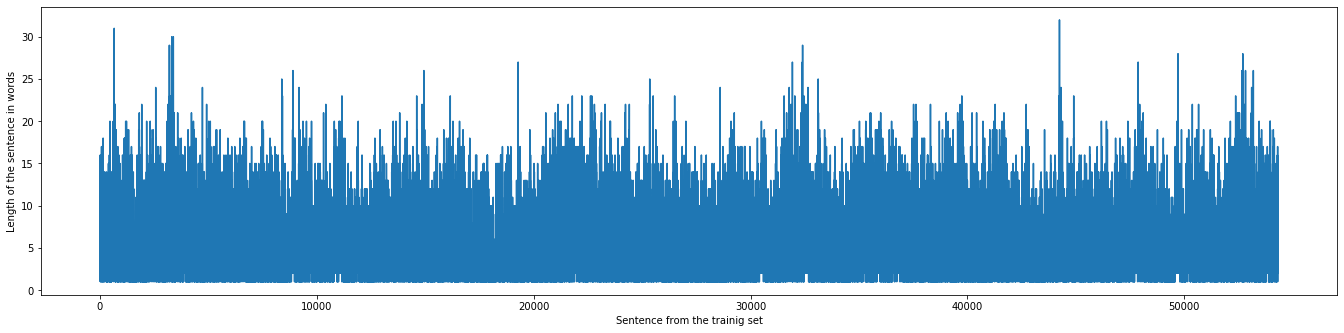

In [25]:
sentences_plot(measured_gloss_sentences)

#### Plot the sorted gloss sentences

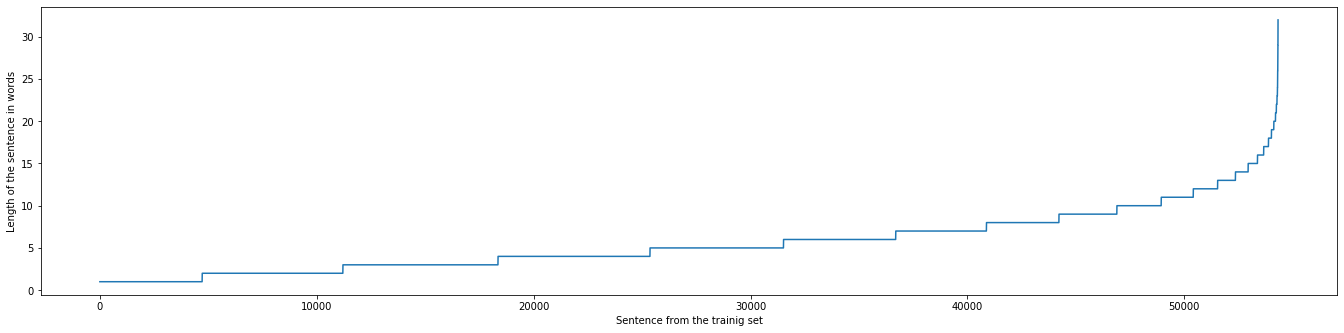

In [26]:
sentences_plot(sorted_gloss_sentences)

---

### 5. Compare the lengths of the german and gloss sentences

#### Without sorting

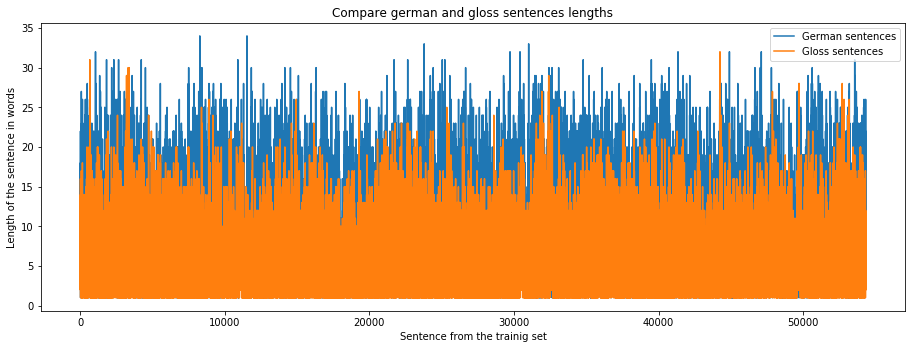

In [27]:
shared_plot(measured_german_sentences, measured_gloss_sentences)